In [3]:
%matplotlib inline

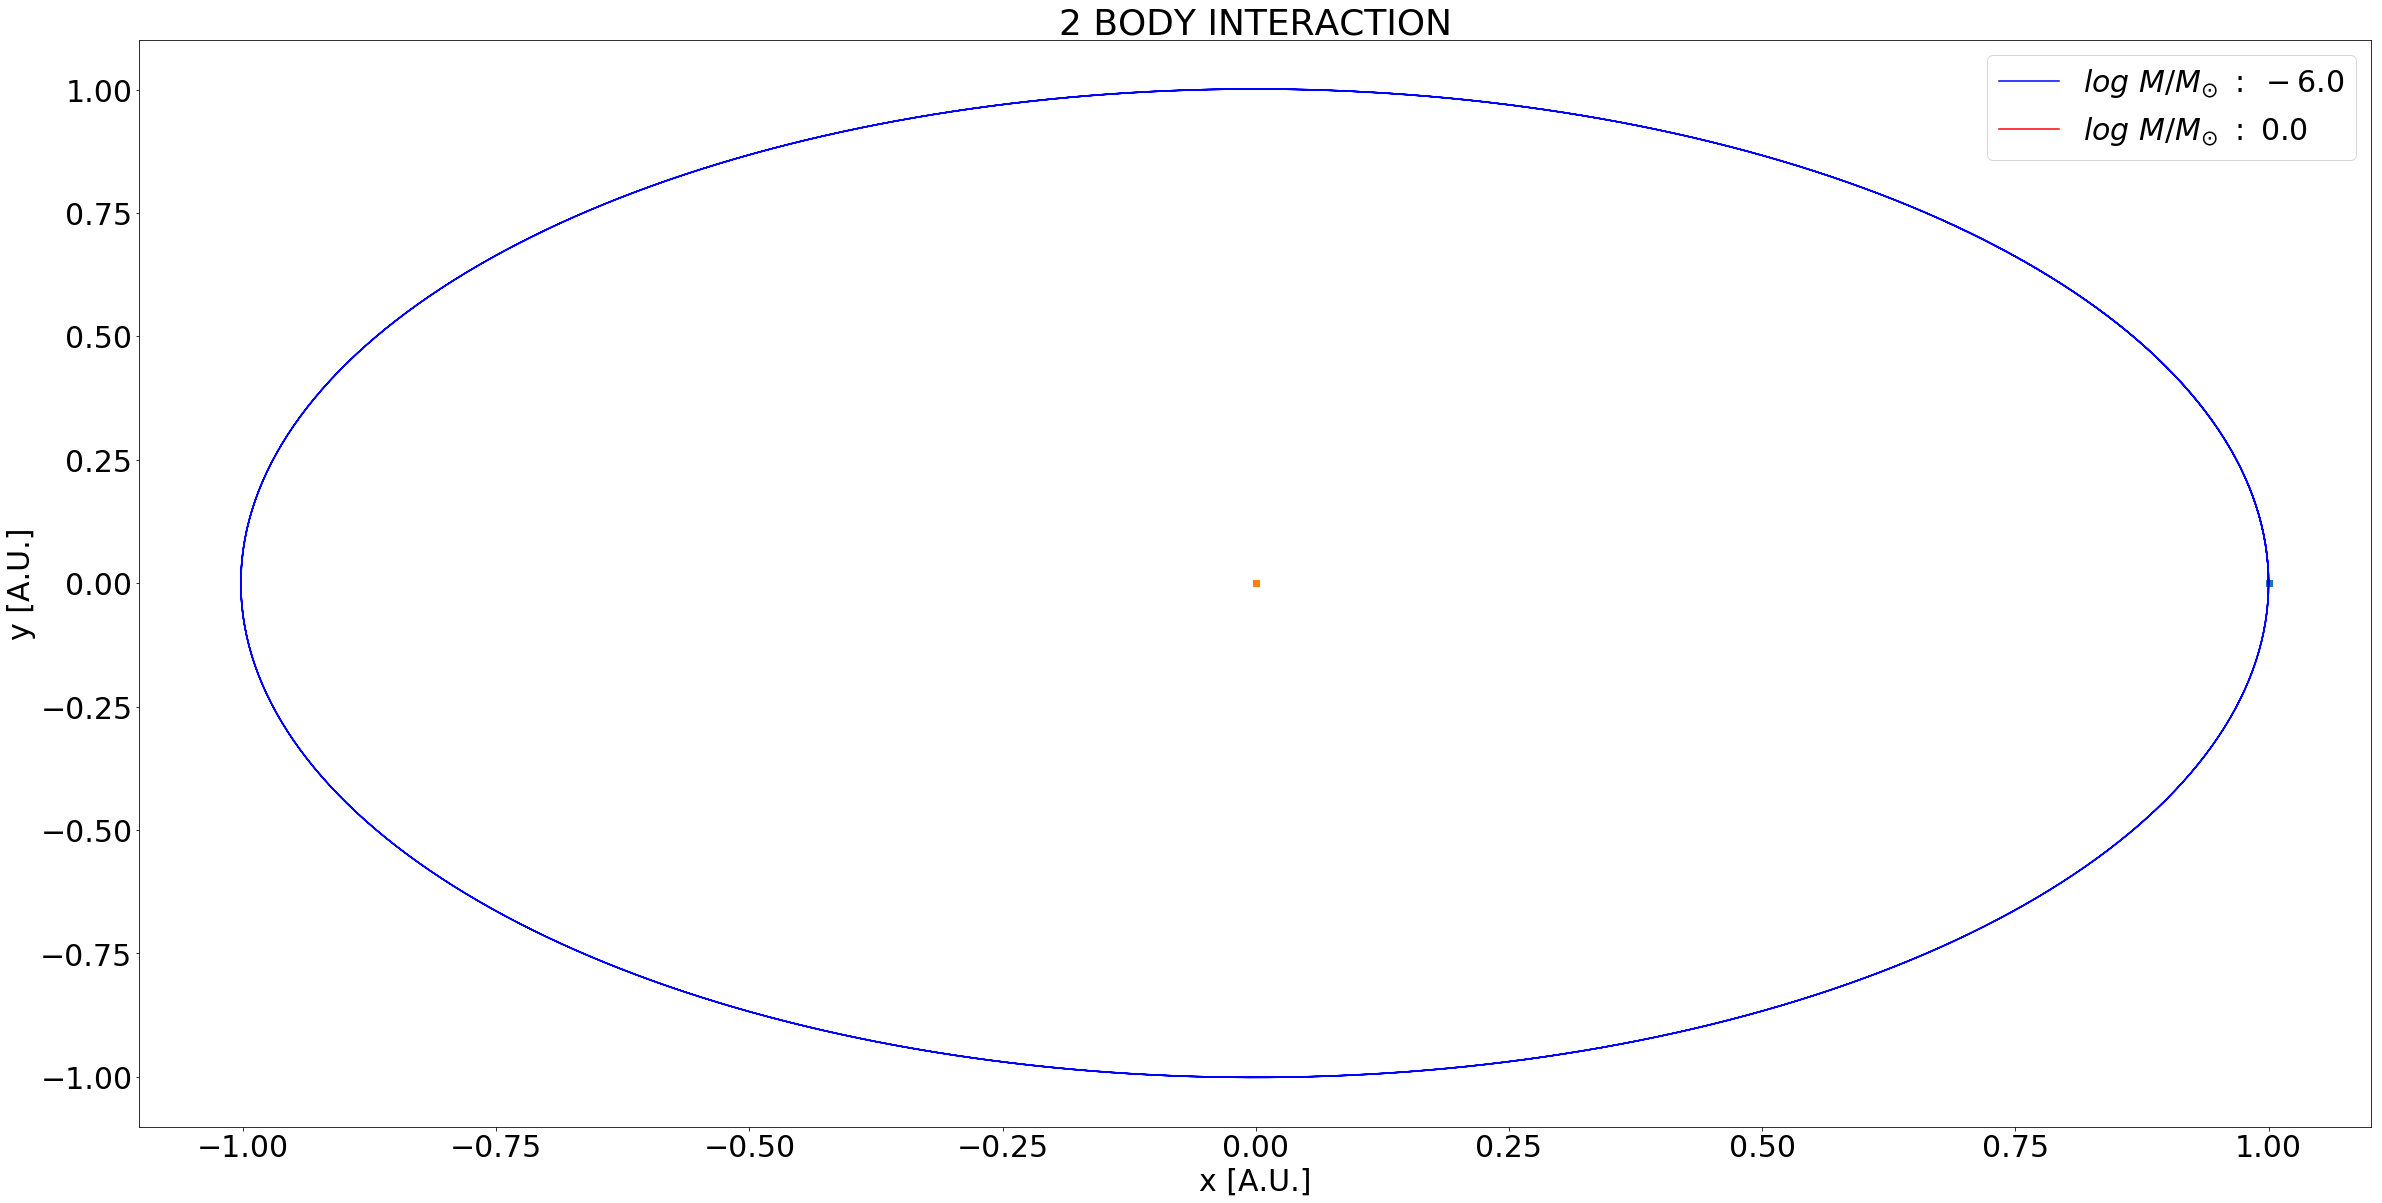

In [4]:
# %load course_materials/ODE1.py
#python>=3.7.2
#this program calculates and plots the orbits of 2 point sources interacting only gravitationally, integrating the equation of motion with the scipy package "odeint"


#modules needed
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint


#define the differential system d(r_i,v_i)/dt
def dAdt(data,t):
	
	d12=np.linalg.norm([data[1]-data[0],data[2]-data[3]])
	
	datadot=np.zeros(len(data)) 
	
	datadot[0]=data[4]
	datadot[1]=data[5]

	datadot[2]=data[6]
	datadot[3]=data[7]

	datadot[4]=-G*m[1]*(data[0]-data[1])/((d12+eps)**3) 
	datadot[5]=-G*m[0]*(data[1]-data[0])/((d12+eps)**3) 

	datadot[6]=-G*m[1]*(data[2]-data[3])/((d12+eps)**3) 
	datadot[7]=-G*m[0]*(data[3]-data[2])/((d12+eps)**3) 
		
		
	
	return datadot 





#changing units of measurement (A.U.=1, year=1, Msun=1)
Kg=1./(1.988E+30)
m=1./(1.496E11)
s=1./(3.153E+07)
G=(6.674E-11)*(m**3)*(Kg**-1)*(s**-2)



#generate random initial positions and velocities for the 2 bodies
x1=0.
x2=1.

y1=0.
y2=0.

vx1=0.
vx2=0.


vy1=0.
vy2=2*3.14



#masses (in solar unit)
m=[1.,1E-06]


#store all the data in a single list
data0=[x1,x2,y1,y2,vx1,vx2,vy1,vy2] #[x],[y],[vx],[vy]

#softening parameter (to avoid divergent forces)
eps=1.E-10 

#time vector
t=np.linspace(0,3.14,1000)  

#solution from odeint as a datacube
sol=odeint(dAdt,data0,t)  

#set general fontsize
plt.rc('font',size=30)

#create the figure
fig=plt.figure(1,figsize=(40,20))
#add axis
ax=fig.add_subplot(111)

#plot initial positions 
ax.scatter(sol[0,1],sol[0,3],marker='s',s=40)
ax.scatter(sol[0,0],sol[0,2],marker='s',s=40)

#plot the orbits
ax.plot(sol[:,1],sol[:,3],color='blue',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[1])))
ax.plot(sol[:,0],sol[:,2],color='red',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[0])))
plt.legend()

ax.set_xlabel('x [A.U.]')
ax.set_ylabel('y [A.U.]')
ax.set_title('2 BODY INTERACTION')
#save the figure
#plt.savefig('2body.png')

#show on screen
plt.show()

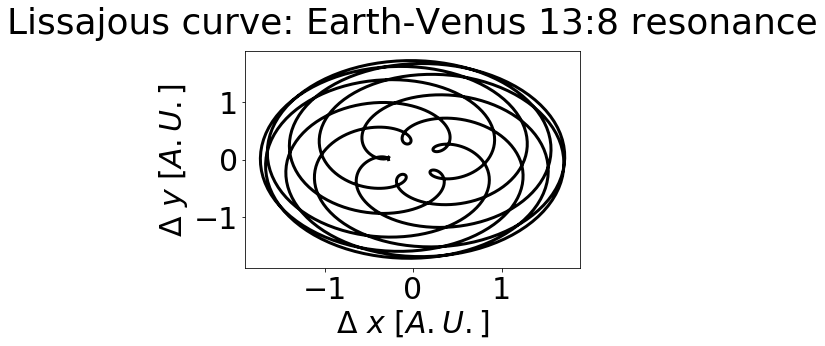

In [7]:
# %load course_materials/NBODY.py
#modules needed
import pylab
from matplotlib.pyplot import *
import math
import numpy
from scipy.integrate import odeint



#body_i acceleration :  direction k (being 2D x or y)

def a(i,k,data): #input: i=index of the body,k=direction (x or y), data=array with positions and velocities
	
	
	A=0. #starting with 0
	
	
	xi=data[4*i] #coordinates for body_i (x & y)
	yi=data[4*i+1]	
	arri=numpy.array([xi,yi]) #put coordinates together
	
	
	for j in range(0,len(bod)): #for every other body
	
		if j==i: #if the same index (same body)
			
			A=A+0. #skip
			
		else:  
	
			
			
	
			xj=data[4*bod[j]] #body_j coordinates (x & y)
			yj=data[4*bod[j]+1]
	
			arrj=numpy.array([xj,yj])  #put coordinates together

			diff=arri-arrj #calculate distance ij
			dij=numpy.linalg.norm(diff) #modulus
			
	
			A= A - G*m[j]*(data[4*i+k]-data[4*j+k])/((dij+eps)**3) #and sum 
	
	#at the end we get the total acceleration (along direction k) for the body_i ONLY!
	return A 


def dAdt(data,t): #differential system
	
	
	datadot=numpy.zeros(len(data)) #define the differential system
	
	
	for k in range(0,2): #for each direction (x,y)
	
		for i in range(0,N): #for each body
	
			datadot[4*i+k+2]=a(i,k,data) #vdot_i=acc_i
			datadot[4*i+k]=data[4*i+k+2] #rdot_i=v_i
		
	
	return datadot 

#MAIN

#changing units (A.U.=1, year=1, Msun=1)

Kg=1./(1.988E+30)
m=1./(1.496E11)
s=1./(3.153E+07)
G=(6.674E-11)*(m**3)*(Kg**-1)*(s**-2)
pi=math.pi


#INPUT: NUMBER OF BODIES (TRY 3/4 MAXIMUM!)
N=3
#INPUT: MASSES 
m=[1,3.003E-06,2.447E-06]
#INPUT: INITIAL POSITIONS AND VELOCITIES
data0=[0,0,0,0, 1,0,0,2*pi, 0.723,0,0,1.175957*(2*pi)] #[x1,y1,vx1,vy1,     x2,y2,vx2,vy2,   ....]



#program
bod=numpy.arange(0,N,1) #index for each body (0 -> N-1)


eps=1.E-10 #softening parameter, to avoid divergences


t=numpy.linspace(0.,8.,1000)  #time vector


sol=odeint(dAdt,data0,t)  #odeint solution


pylab.rc('font',size=30) #plot


dx=sol[:,8]-sol[:,4] #x_venus-x_earth
dy=sol[:,9]-sol[:,5] #y_venus-y_earth

plot(dx,dy,color='black',lw=3)

xlabel(r'$\Delta\ x \ [A.U.]$')
ylabel(r'$\Delta\ y \ [A.U.]$')
title('Lissajous curve: Earth-Venus 13:8 resonance',y=1.05)

show()